### Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

### EDA

In [2]:
df = pd.read_csv('bank-full.csv',delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:>

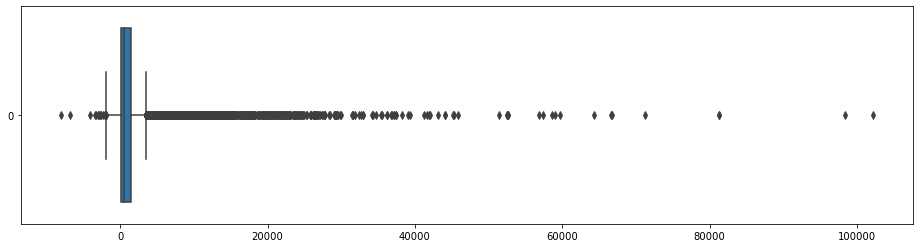

In [4]:
figure(figsize=(16,4))
sns.boxplot(data=df["balance"],orient="h")

# There are many extreme outliers present.

In [5]:
df["balance"].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [6]:
# Droping heavy outliers.

ext_out = df[(df["balance"]>30000) & (df["balance"]<400000)].index
ext_out

Int64Index([  446,   920,  2778,  3197,  4851,  7156,  9425,  9536, 12926,
            13154, 14816, 15869, 19410, 19420, 19785, 19795, 20737, 21150,
            21192, 21346, 22091, 22765, 24568, 25168, 25782, 26089, 26227,
            27049, 27067, 27090, 27159, 27390, 27550, 29512, 31222, 34016,
            34162, 34170, 35315, 39721, 39989, 40763, 41374, 41662, 41693,
            41797, 42379, 42558, 42990, 43053, 43393, 44232],
           dtype='int64')

In [7]:
df = df.drop(ext_out,axis=0)

<AxesSubplot:>

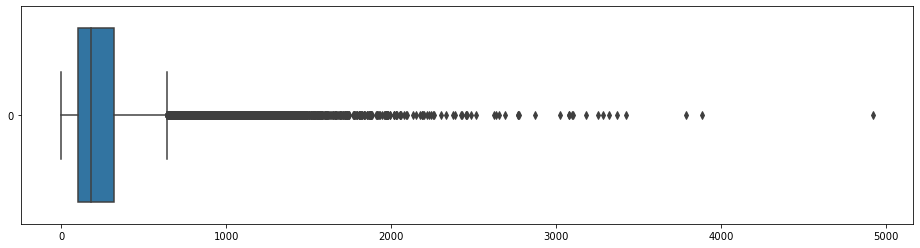

In [8]:
figure(figsize=(16,4))
sns.boxplot(data=df["duration"],orient="h")

In [9]:
# Droping heavy outliers.
out_dur = df[(df["duration"]>2000) & (df["duration"]<400000)].index
out_dur

Int64Index([  152,  1034,  1416,  1731,  1850,  2386,  2404,  3135,  4382,
             6451,  7492,  8572,  9515,  9947, 10726, 10989, 11284, 11386,
            11519, 11635, 12347, 12863, 13936, 16454, 17031, 17642, 18195,
            19317, 19639, 21113, 23594, 24044, 24054, 24059, 24095, 24148,
            26830, 26887, 28064, 28696, 28872, 29342, 29669, 30154, 30747,
            31325, 31337, 31500, 31778, 32986, 38927, 39991, 41162, 41420,
            41895, 42265, 42534, 43901, 44602],
           dtype='int64')

In [10]:
df = df.drop(out_dur,axis=0)

<AxesSubplot:>

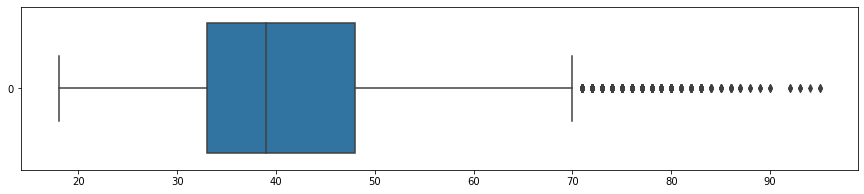

In [11]:
figure(figsize=(15,3))
sns.boxplot(data=df["age"],orient="h")

<AxesSubplot:xlabel='y', ylabel='count'>

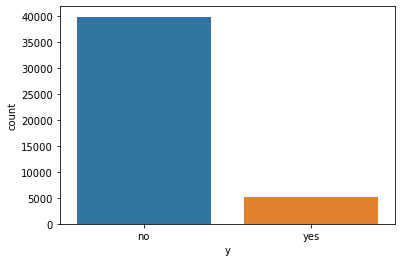

In [12]:
sns.countplot(data=df,x="y")
# Data-set is imbalanced.

<AxesSubplot:xlabel='job', ylabel='count'>

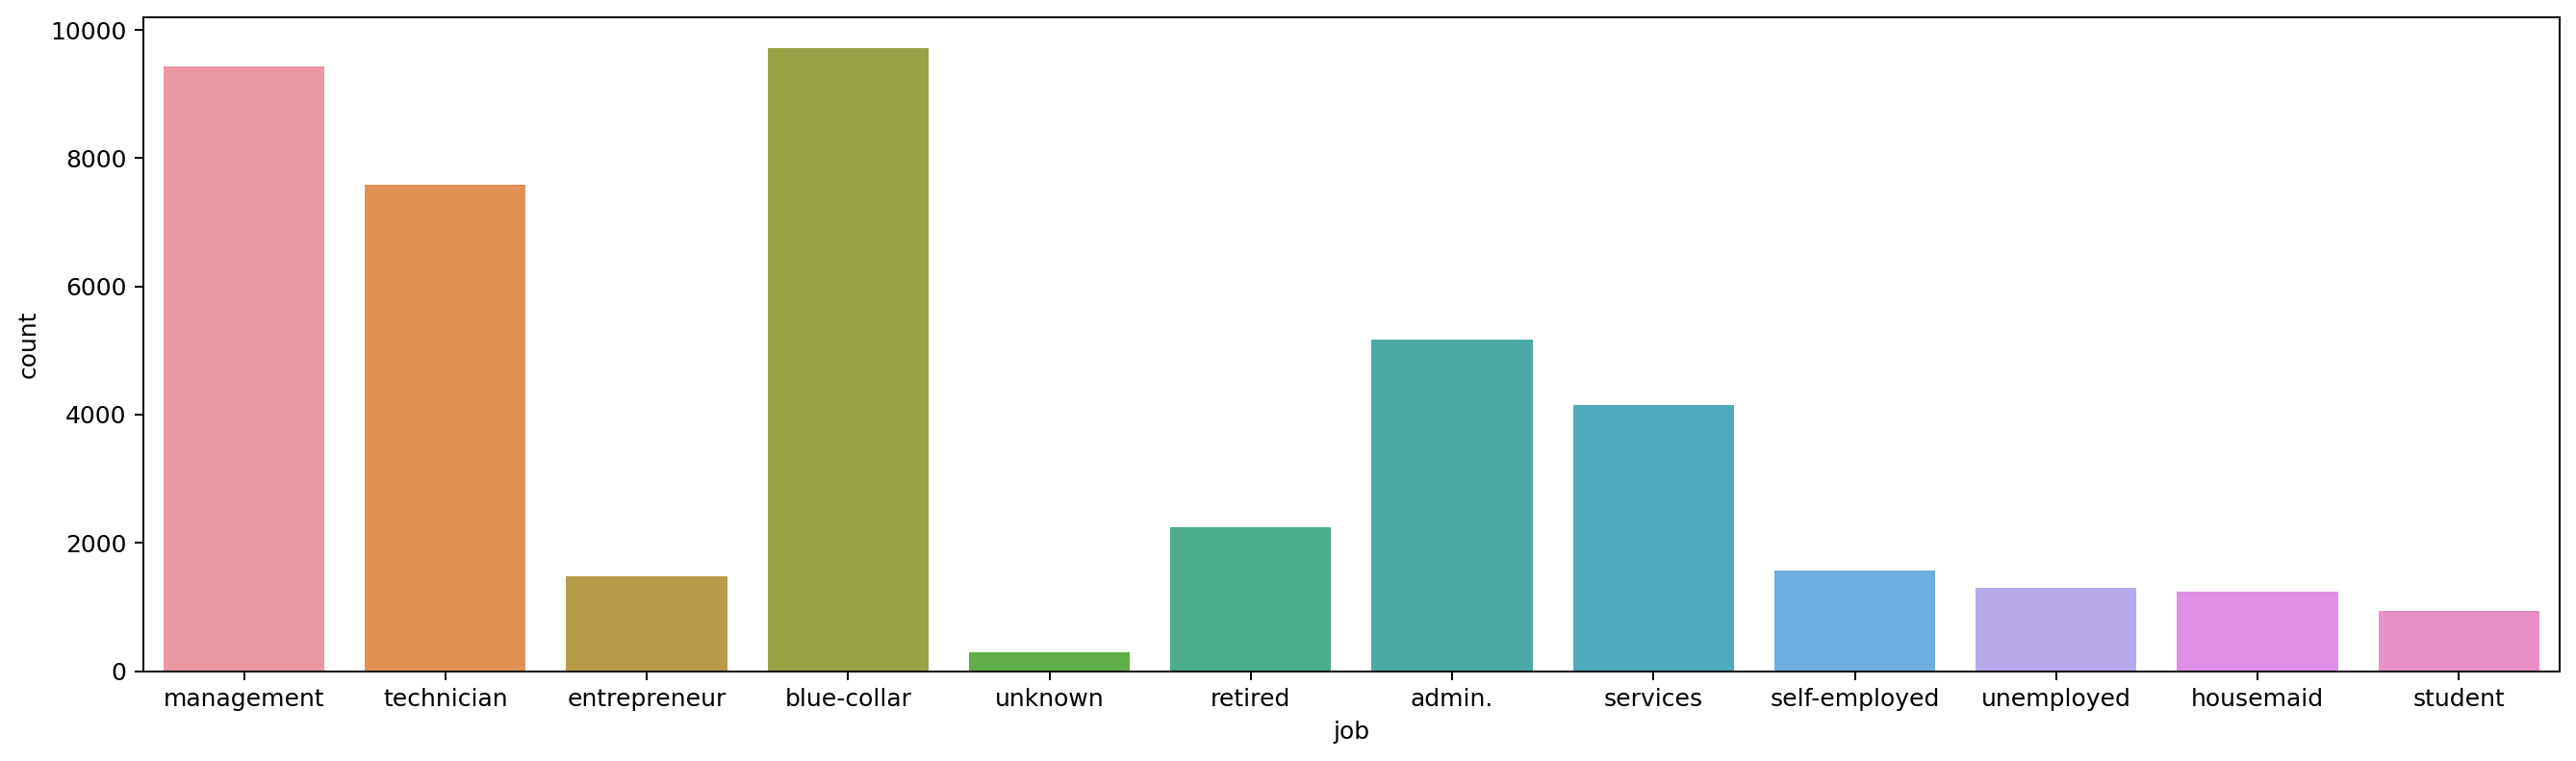

In [13]:
figure(figsize=(18,5),dpi=180)
sns.countplot(data=df,x="job")

<AxesSubplot:xlabel='marital', ylabel='count'>

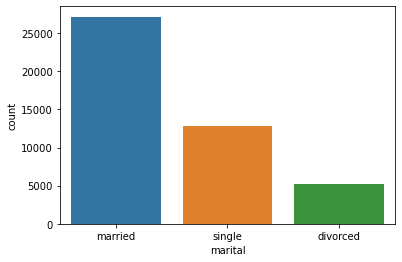

In [14]:
sns.countplot(data=df,x="marital")

<AxesSubplot:xlabel='education', ylabel='count'>

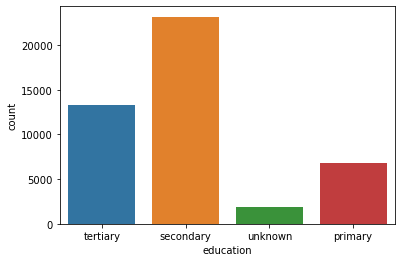

In [15]:
sns.countplot(data=df,x="education")

In [16]:
df["poutcome"].value_counts()

unknown    36860
failure     4895
other       1837
success     1508
Name: poutcome, dtype: int64

In [17]:
# Seperating float and object type

obs = df.select_dtypes(include="object")
num_df = df.select_dtypes(exclude="object")

In [18]:
obs = obs.drop("y",axis=1)

In [19]:
# One-hot encoding.
y1 =  pd.get_dummies(df["y"],drop_first=True)
y1.head(3)

,yes
0,0
1,0
2,0


In [20]:
y1.value_counts()

yes
0      39850
1       5250
dtype: int64

In [21]:
obs_df = pd.get_dummies(obs)
obs_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [22]:
df1 = pd.concat([obs_df,num_df,y1],axis=1)
df1.head(2)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,yes
0,0,0,0,0,1,0,0,0,0,0,...,0,1,58,2143,5,261,1,-1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,44,29,5,151,1,-1,0,0


<AxesSubplot:>

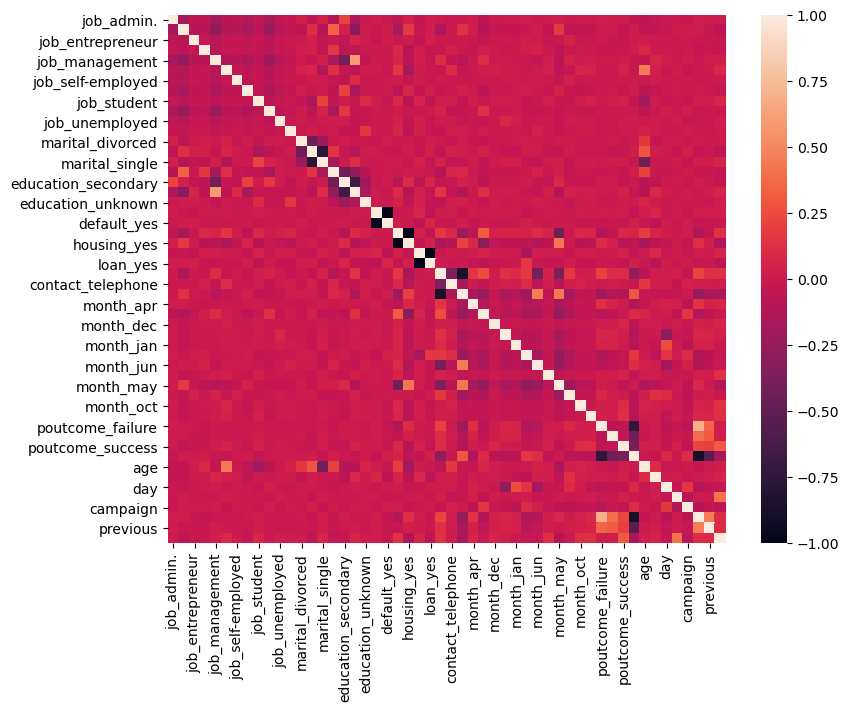

In [23]:
figure(figsize=(9,7),dpi=100)
sns.heatmap(df1.corr())

### Model building and tuning

In [24]:
X = df1.drop("yes",axis=1)
y = df1["yes"]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
scaler = StandardScaler()

In [28]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
log_model = LogisticRegression(solver='saga',max_iter=3000)

In [32]:
# Penalty Type
penalty = ['elasticnet']
l1_ratio = np.linspace(0,1,10)
C = np.logspace(0, 4, 10)

param_grid = {'penalty':penalty,
              'l1_ratio':l1_ratio,
              'C':C}

In [33]:
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [34]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=3000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['elasticnet']})

In [35]:
grid_model.best_params_

{'C': 2.7825594022071245, 'l1_ratio': 0.0, 'penalty': 'elasticnet'}

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

### Predictions 

In [37]:
y_pred = grid_model.predict(scaled_X_test)

### Model evaluation

In [38]:
accuracy_score(y_test,y_pred)

0.9022172949002217

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<Figure size 1300x1300 with 0 Axes>

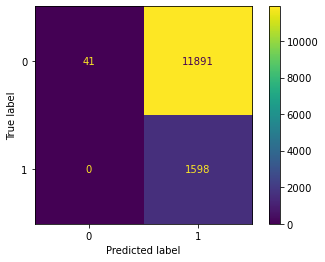

In [39]:
figure(figsize=(5,5),dpi=260)
plot_confusion_matrix(grid_model,X_test,y_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11932
           1       0.66      0.36      0.46      1598

    accuracy                           0.90     13530
   macro avg       0.79      0.67      0.71     13530
weighted avg       0.89      0.90      0.89     13530



In [41]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1400x1000 with 0 Axes>

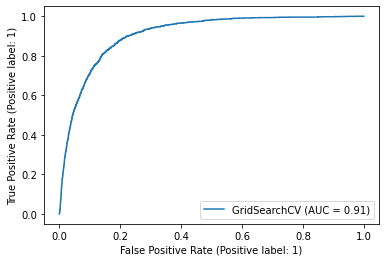

In [42]:
figure(figsize=(7,5),dpi=200)
plot_roc_curve(grid_model,scaled_X_test,y_test)